In [43]:
# %%
import random
import matplotlib.pyplot as plt

class Population:
    """ A population of cratures.

    Attributes:
        creator (subtype of creature): A class used to create creatures
        specimens (set): A set of Creature instances.
        history (list): A list of population sizes.
    """

    def __init__(self, creator, n=100):
        """initalize population w creatures"""
        self.creator = creator
        self.specimens = {self.creator() for _ in range(n)}
        self.history = []

        #self.n = n   getter robi to za nas

    @property
    def specimens(self):
        return self._specimens

    @specimens.setter
    def specimens(self, value):
        self._specimens = value
        self.n = len(value)

    def natural_selection(self):
        """Model of natural selection process: kill and reproduce"""
        # Próbujemy zabić wszystkie stwory (dla każdego odpalamy .kill)
        #for specimen in self.speciemens:
            #specimen.kill()
        newborns = {specimen.reproduce() for specimen in self.specimens} - {None}
        {specimen.kill() for specimen in self.specimens}
        
        # Zapisujemy gdzieś poprzedni stan populacji (n)
        
        self.history.append(self.n)
        
        # Usuwamy z populacji zabite stwory
        
        self.specimens = {specimen for specimen in self.specimens
                          if specimen.alive} | newborns

    def plot_history(self):
        plt.plot(self.history)

    def plot_histogram(self, parameter): # parameter = 'p+death', na przykład
        # self.specimens to jest zbiór stworów a każdy stwór ma swoje p_death
        # z każdego stwora biorę jego "śmietelność" -> zbiór śmiertelności 
        # i ten zbiór śmiertelności wizualizuje na histogramie
        
        plt.hist([getattr(specimen, parameter) for specimen in self.specimens])


class Probability:
    
    """Descrpitor for probability attributes"""

    def __set_name__(self, owner, name): # name = 'p_death' albo 'p_reproduce'
        # self.public_name = name 
        self.private_name = '_' + name

    def __get__(self, obj, objtype=None): # będizemy odczytywać wartość zapisaną gdzie indziej
        # Wartość będize zapisana w _p_death
        return getattr(obj,self.private_name) # Zamiast _p_death tu powinna być dowolna nazwa (np. p_reproduce). 
                                              # Tu używamy self.private_name, który jest str

    def __set__(self, obj, value): # tutaj chcemy pinować właściwych wartości ( 0 =<value =< 1)
        setattr(obj, self.private_name, min(1, max(0, value))) # Tu też
        
        #if value < 0:
        #    obj._p_death = 0
        #elif value > 1:
        #    obj._p_death = 1
        #else:
        #    obj._p_death = value


class Creature:
    
    """A creature with probability of death and reproduction."""

    sigma = 0.02 # Stadnard diviation random component od mutation
    p_death = Probability()
    p_reproduce = Probability()
    
    alive = True  # Atrybut
    
    def __init__(self, p_death=0.2, p_reproduce=0.2):
        self.p_death = p_death
        self.p_reproduce = p_reproduce
        self.alive = True
    
    def kill(self):  # Metoda
        if random.random() <= self.p_death:
            self.alive = False
            
    def reproduce(self):  
        if random.random() <= self.p_reproduce and self.alive: 
            return type(self)()
            
class Predator(Creature):

    p_death_hungry = Probability()
    _p_death = Probability()
    
    def __init__(self, p_death=0.2, p_reproduce=0.5, p_death_hungry=0.8):
        
        super().__init__(p_death, p_reproduce)
        self.p_death_hungry = p_death_hungry
        self.hungry = False
    
    def hunt(self, prey):
        if random.random() <= prey.p_hunt and prey.alive:
            self.hungry = False
            prey.alive = False

    @property
    def p_death(self):
        return self.p_death_hungry if self.hungry else self._p_death

    @p_death.setter
    def p_death(self, value):
        self._p_death = value

class Prey(Creature):

    p_hunt = Probability()
    
    def __init__(self, p_death=0.2, p_reproduce=0.22, p_hunt=0.8):
        
        super().__init__(p_death, p_reproduce)
        self.p_hunt = p_hunt

def hunting(prey, predators): 
    # Każdemy elementowi ze zbioru predators.specimens muszę przyporządkować element zbioru
    # prey.specimens
    # liczba predatorów: predators.n; liczba ofiar prey.n 
    for predator in predators.specimens:
        predator.hungry = True
    
    n_pairs = min(predators.n, prey.n)
    pairs = zip(list(predators.specimens)[:n_pairs], list(prey.specimens)[:n_pairs])
    
    for predator, prey in pairs:
        predator.hunt(prey)

def simulation(prey, predators, n):
    for _ in range(n):
        hunting(prey, predators)
        prey.natural_selection()
        predators.natural_selection()

def plot_history(prey, predators):
    plt.plot(list(zip(prey.history, predators.history)))
    plt.legend(['Prey', 'Predators'])

In [3]:
predator = Predator()

In [4]:
predator.alive, predator.hungry, predator.p_death

(True, False, 0.2)

In [5]:
predator.hungry = True
predator.p_death

0.8

In [6]:
prey = Prey()

In [7]:
prey.alive, prey.p_hunt

(True, 0.3)

In [8]:
predator.hungry = True 
predator.hunt(prey)
prey.alive, predator.hungry

(False, False)

In [44]:
n_prey = 30000
n_predator = 200

population_prey = Population(creator=Prey, n=n_prey)
population_predators = Population(creator=Predator, n=n_predator)

In [47]:
simulation(population_prey, population_predators, n=60)

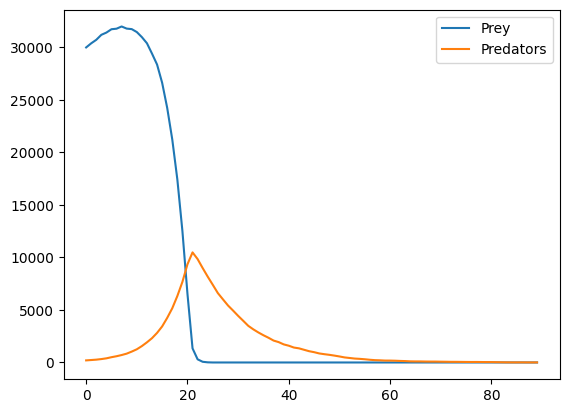

In [48]:
plot_history(population_prey, population_predators)